# Top 100 Video Game Sales

## Imports

In [2]:
import seaborn as sns
import pandas as pd

❌ __TODO:__ ⭐ Charts are not in the default color and settings.

In [32]:
sns.set_theme()

In [ ]:
games = pd.read_csv('top100videogamesales.csv')
games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Nintendo,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Mario Kart Wii,Nintendo,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
2,3,Wii Sports Resort,Nintendo,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
3,4,New Super Mario Bros.,Nintendo,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
4,5,Wii Play,Nintendo,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02


## Global Sales

### Total global sales for each year

<AxesSubplot:xlabel='Year', ylabel='Global_Sales'>

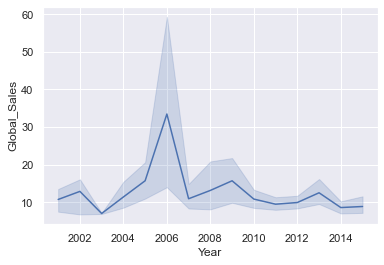

In [35]:
sns.lineplot(data=games, palette="rocket", x='Year', y='Global_Sales')

❌ __TODO:__ Markdown Explanation of chart above

### ⭐ What percentage of global sales does PlayStation have in the dataset?

❌ __TODO:__ Markdown Explanation of chart above

### ⭐ Sales by region for each publisher (bar chart)

❌ __TODO:__ Markdown Explanation of chart above

## Games Distrubution

### Global sales distribution for games iwth Action as the genre (Histogram)

❌ __TODO:__ Markdown Explanation of chart above

### ⭐ What is the distribution of sales for Shooter games

❌ __TODO:__ Markdown Explanation of chart above

## Sales by Genre

### Percentage of sales each genre had in the Nort American market (Pie chart)
_Group smaller slices together into an "other" category to make it easier to read_

❌ __TODO:__ Detailed what is included in the other category

### Percentage of sales each genre had in the European market (Pie chart)
_Group smaller slices together into an "other" category to make it easier to read_

❌ __TODO:__ Detailed what is included in the other category

❌ __TODO:__ Explain the differences and similarities between the NA and EU charts

## Games

### Total number of games created for each platform (Bar or Column Chart)

❌ __TODO:__ Markdown Explanation of chart above

### ⭐ What genre of game is present the most in the top 100 games from 2000 - 2015? 

❌ __TODO:__ Markdown Explanation of chart above